In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [5]:
df = pd.read_csv("../input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Firstly we have to check the shape of the data**** then have to check is there any null values in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 we checked there is no null values in the dataset********

>*if you want more stats about the data issue the below 

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

by issueing below function we check the correlation of the data points

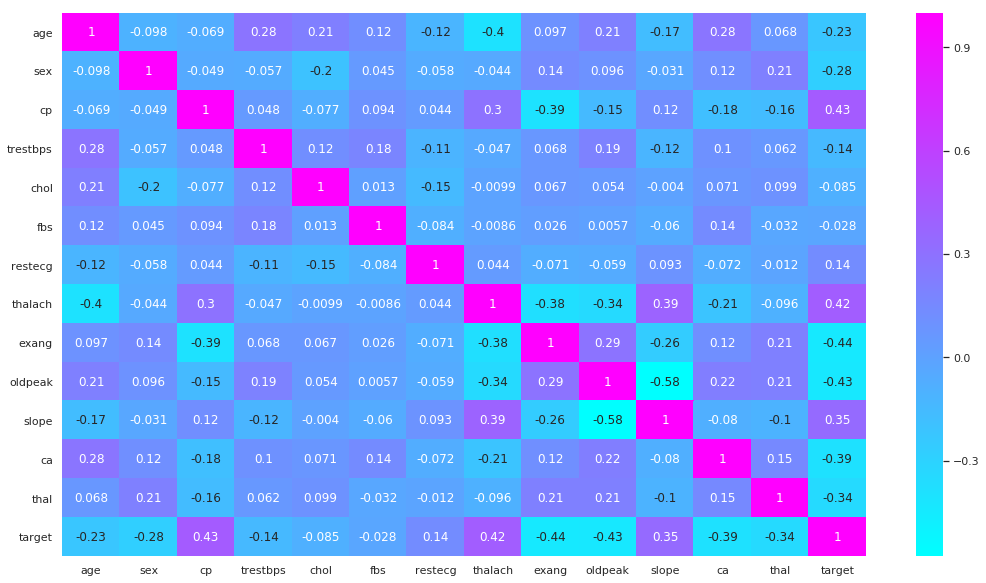

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

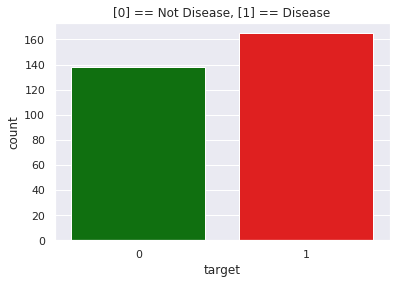

In [12]:
sns.countplot(df.target, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");

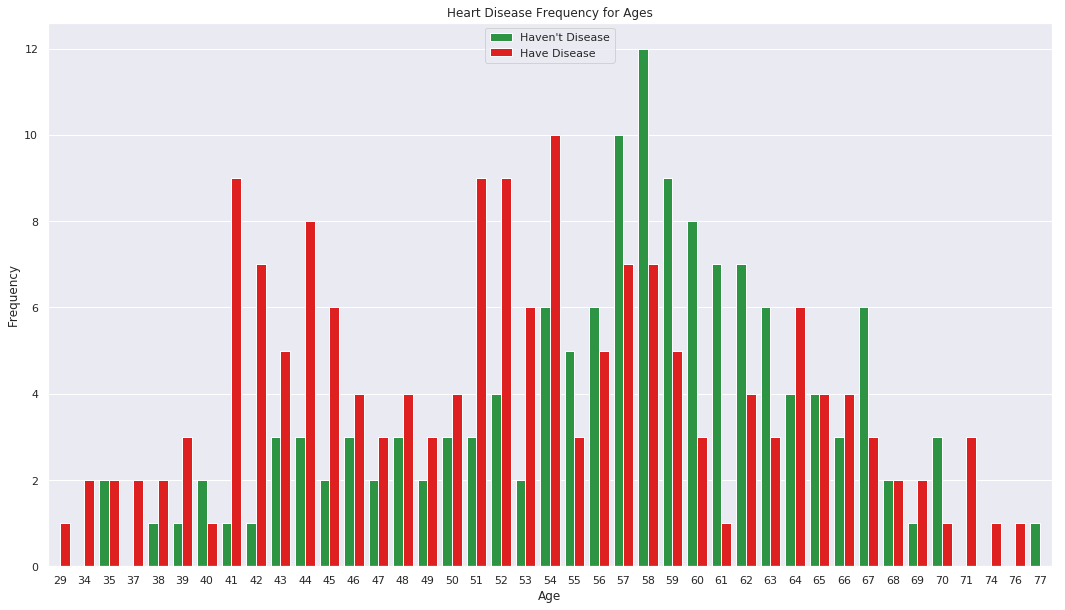

In [13]:
plt.figure(figsize=(18, 10))
sns.countplot(x='age', hue='target', data=df, palette=['#1CA53B', 'red'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

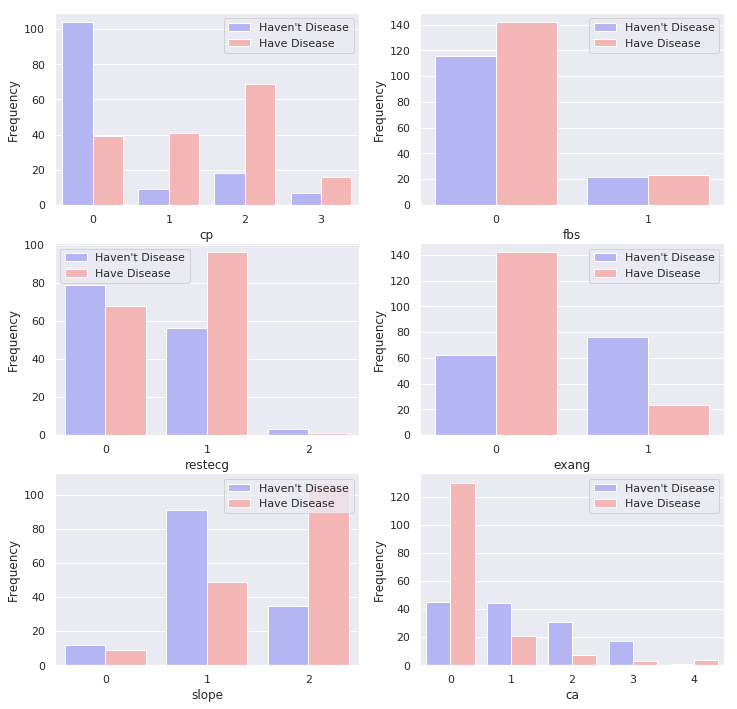

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
fs = ['cp', 'fbs', 'restecg','exang', 'slope', 'ca']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='target', data=df, palette='bwr', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Haven't Disease", "Have Disease"])

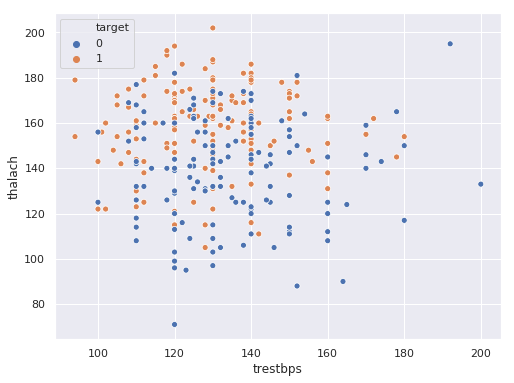

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

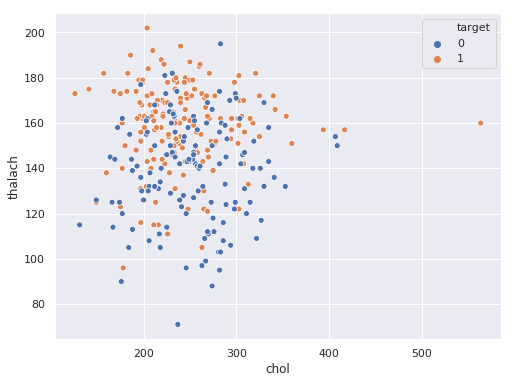

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

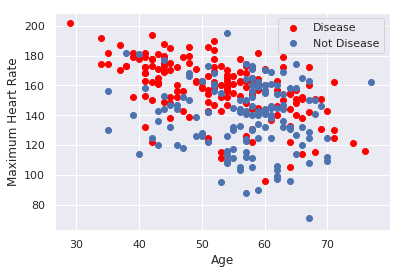

In [17]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

# Import tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [19]:
# Define our feature and labels
X = df.drop(['target'], axis=1).values
y = df['target'].values

In [21]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [22]:
class Model:
    def __init__(self, model, X, y):
        self.model = model
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.5, random_state=42)
        
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        
    def model_str(self):
        return str(self.model.__class__.__name__)
    
    def crossValScore(self, cv=5):
        print(self.model_str() + "\n" + "="*60)
        scores = ["accuracy", "precision", "recall", "roc_auc"]
        for score in scores:  
            cv_acc = cross_val_score(self.model, 
                                     self.X_train, 
                                     self.y_train, 
                                     cv=cv, 
                                     scoring=score).mean()
            
            print("Model " + score + " : " + "%.3f" % cv_acc)
        
    def accuracy(self):
        accuarcy = accuracy_score(self.y_test, self.y_pred)
        print(self.model_str() + " Model " + "Accuracy is: ")
        return accuarcy
        
    def confusionMatrix(self):        
        plt.figure(figsize=(6, 6))
        mat = confusion_matrix(self.y_test, self.y_pred)
        sns.heatmap(mat.T, square=True, 
                    annot=True, 
                    cbar=False, 
                    xticklabels=["Haven't Disease", "Have Disease"], 
                    yticklabels=["Haven't Disease", "Have Disease"])
        
        plt.title(self.model_str() + " Confusion Matrix")
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values');
        plt.show();
        
    def classificationReport(self):
        print(self.model_str() + " Classification Report" + "\n" + "="*60)
        print(classification_report(self.y_test, 
                                    self.y_pred, 
                                    target_names=['Non Disease', 'Disease']))
    
    def rocCurve(self):
        y_prob = self.model.predict_proba(self.X_test)[:,1]
        fpr, tpr, thr = roc_curve(self.y_test, y_prob)
        lw = 2
        plt.figure(figsize=(10, 8))
        plt.plot(fpr, tpr, 
                 color='darkorange', 
                 lw=lw, 
                 label="Curve Area = %0.3f" % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='green', 
                 lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(self.model_str() + ' Receiver Operating Characteristic Plot')
        plt.legend(loc="lower right")
        plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier

clf1 = Model(model=RandomForestClassifier(n_estimators=1000), X=X, y=y)

In [54]:
clf1.crossValScore(cv=10)

RandomForestClassifier
Model accuracy : 0.795
Model precision : 0.809
Model recall : 0.832
Model roc_auc : 0.907


In [55]:
clf1.accuracy()

RandomForestClassifier Model Accuracy is: 


0.8421052631578947

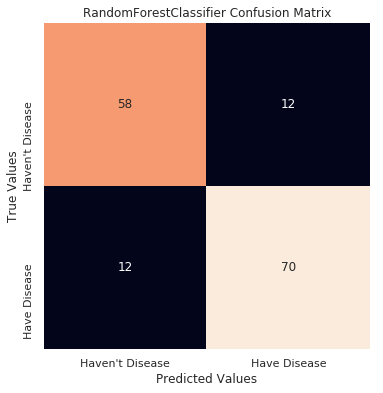

In [56]:
clf1.confusionMatrix()

In [57]:
import xgboost as xgb
clf2 = Model(model=xgb.XGBClassifier(), X=X, y=y)


In [58]:
clf2.crossValScore(cv=10)

XGBClassifier
Model accuracy : 0.775
Model precision : 0.790
Model recall : 0.821
Model roc_auc : 0.884


In [60]:
clf2.accuracy()

XGBClassifier Model Accuracy is: 


0.7960526315789473

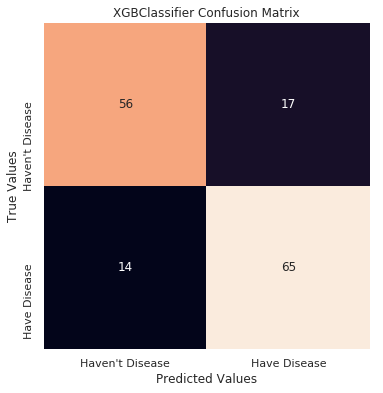

In [61]:
clf2.confusionMatrix()

In [63]:
clf1.classificationReport()

RandomForestClassifier Classification Report
              precision    recall  f1-score   support

 Non Disease       0.83      0.83      0.83        70
     Disease       0.85      0.85      0.85        82

   micro avg       0.84      0.84      0.84       152
   macro avg       0.84      0.84      0.84       152
weighted avg       0.84      0.84      0.84       152



In [64]:
clf2.classificationReport()

XGBClassifier Classification Report
              precision    recall  f1-score   support

 Non Disease       0.77      0.80      0.78        70
     Disease       0.82      0.79      0.81        82

   micro avg       0.80      0.80      0.80       152
   macro avg       0.79      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152



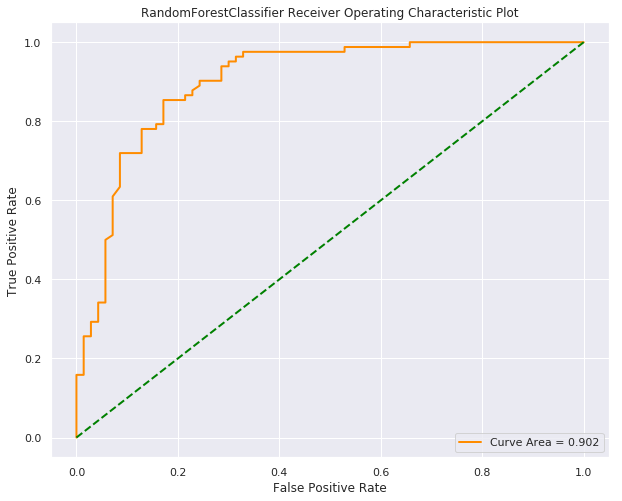

In [65]:
clf1.rocCurve()

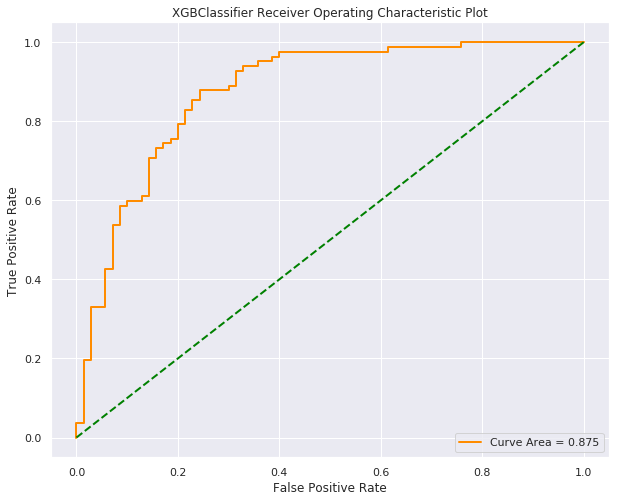

In [66]:
clf2.rocCurve()

In [67]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

lr = LogisticRegression(C=10, n_jobs=-1)
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), lr)

pip = Model(model=pipeline, X=X, y=y)

In [68]:
pip.crossValScore()

Pipeline
Model accuracy : 0.794
Model precision : 0.814
Model recall : 0.817
Model roc_auc : 0.900


In [69]:
pip.accuracy()

Pipeline Model Accuracy is: 


0.8092105263157895

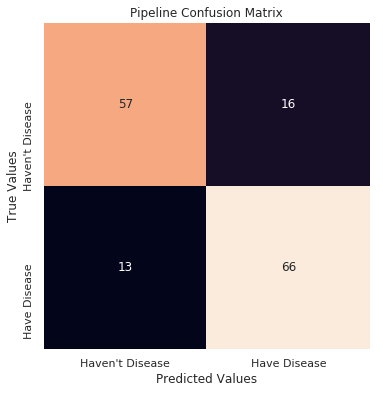

In [70]:
pip.confusionMatrix()

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = Model(model=KNeighborsClassifier(n_neighbors=100), X=X, y=y)

In [72]:
knn.crossValScore()

KNeighborsClassifier
Model accuracy : 0.684
Model precision : 0.638
Model recall : 1.000
Model roc_auc : 0.904


In [73]:
knn.accuracy()

KNeighborsClassifier Model Accuracy is: 


0.7960526315789473

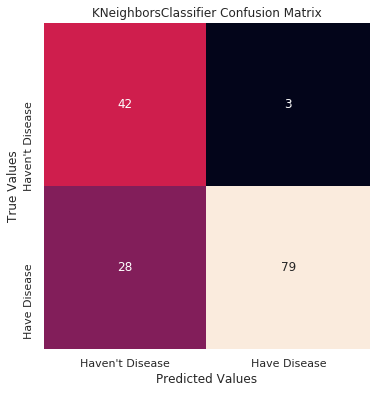

In [74]:
knn.confusionMatrix()

In [84]:
models = [clf1, clf2,Ann,pip, knn]
names = []
accs = []
for model in models:
    accs.append(model.accuracy())
    names.append(model.model_str())

RandomForestClassifier Model Accuracy is: 
XGBClassifier Model Accuracy is: 
MLPClassifier Model Accuracy is: 
Pipeline Model Accuracy is: 
KNeighborsClassifier Model Accuracy is: 


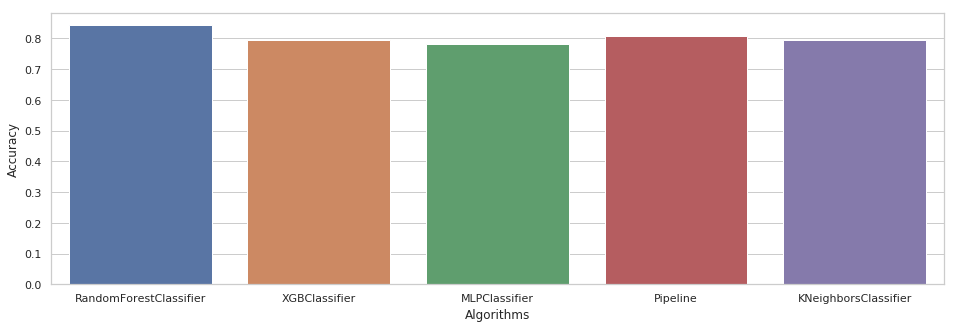

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1.2,0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=names, y=accs)
plt.savefig('models_accuracy.png')
plt.show()

In [80]:
from sklearn.neural_network import MLPClassifier
Ann = Model(model=MLPClassifier(hidden_layer_sizes=(300,150)), X=X, y=y)


In [81]:
Ann.crossValScore()

MLPClassifier
Model accuracy : 0.749
Model precision : 0.788
Model recall : 0.782
Model roc_auc : 0.873


In [82]:
Ann.accuracy()

MLPClassifier Model Accuracy is: 


0.7828947368421053

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pl_mlp=Pipeline(steps=[('scaler',StandardScaler()),('mil_ann',MLPClassifier(hidden_layer_sizes=(1275,637)))])
scores=cross_val_score(pl_mlp,X_train,y_train,cv=10,scoring='accuracy')
print('ANN:',scores.mean())

ANN: 0.7770942028985507


In [96]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pl_xgb=Pipeline(steps=[('svm',xgb.XGBClassifier(objective='multi:softmax',num_class=2))])
scores=cross_val_score(pl_xgb,X_train,y_train,cv=10,scoring='accuracy')
print('xgb:',scores.mean())

xgb: 0.8056086956521739
